In [459]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import pairwise_distances,silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from kmodes.kprototypes import KPrototypes

In [312]:
df = pd.read_csv("/Users/fernandohernandezesquivel/Desktop/Trabajo final/BM_DF_2022.csv",skiprows=12, encoding="latin",engine='python')
#Colab
#df = pd.read_csv("/content/BM_DF_2022.csv",skiprows=12, encoding="latin",engine='python')

## EXPLORACIÓN DE DATOS

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206531 entries, 0 to 206530
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Dispositivo                    206531 non-null  object
 1   Grupo de dispositivos          206531 non-null  object
 2   Nombre                         95047 non-null   object
 3   Device ID                      206531 non-null  object
 4   User ID                        95047 non-null   object
 5   Apellido                       95047 non-null   object
 6   Conductor                      95047 non-null   object
 7   Grupo de conductores           95042 non-null   object
 8   Depart Date                    206531 non-null  object
 9   Fecha de inicio                206531 non-null  object
 10  Iniciar en horas de servicios  206531 non-null  object
 11  Duración de conducción         206531 non-null  object
 12  Fecha de parada                206531 non-nu

In [314]:
df.iloc[0]

Dispositivo                                                               FV040849
Grupo de dispositivos                                             | MEXICO - BMA |
Nombre                                                                         NaN
Device ID                                                                      b33
User ID                                                                        NaN
Apellido                                                                       NaN
Conductor                                                                      NaN
Grupo de conductores                                                           NaN
Depart Date                                                       febrero 22, 2020
Fecha de inicio                                           feb. 22, 2020 1:03:07 PM
Iniciar en horas de servicios                                                FALSO
Duración de conducción                                                        0:06
Fech

In [315]:
df.isna().sum()

Dispositivo                           0
Grupo de dispositivos                 0
Nombre                           111484
Device ID                             0
User ID                          111484
Apellido                         111484
Conductor                        111484
Grupo de conductores             111489
Depart Date                           0
Fecha de inicio                       0
Iniciar en horas de servicios         0
Duración de conducción                0
Fecha de parada                       0
Parada en horas de servicio           0
Distancia                             0
Duración de la parada                 0
Ubicación                             0
Tipos de zonas de parada          11062
Tiempo en ralentí                     0
Velocidad máxima                      0
dtype: int64

In [316]:
df.head()

,Dispositivo,Grupo de dispositivos,Nombre,Device ID,User ID,Apellido,Conductor,Grupo de conductores,Depart Date,Fecha de inicio,Iniciar en horas de servicios,Duración de conducción,Fecha de parada,Parada en horas de servicio,Distancia,Duración de la parada,Ubicación,Tipos de zonas de parada,Tiempo en ralentí,Velocidad máxima
0,FV040849,| MEXICO - BMA |,NaN,b33,NaN,NaN,NaN,NaN,"febrero 22, 2020","feb. 22, 2020 1:03:07 PM",FALSO,0:06,"feb. 22, 2020 1:09:23 PM",FALSO,0,0:08,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,0:00,2
1,FV040849,| MEXICO - BMA |,NaN,b33,NaN,NaN,NaN,NaN,"febrero 22, 2020","feb. 22, 2020 1:17:30 PM",FALSO,0:04,"feb. 22, 2020 1:21:39 PM",FALSO,0,0:05,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,0:00,3
2,FV040849,| MEXICO - BMA |,NaN,b33,NaN,NaN,NaN,NaN,"febrero 22, 2020","feb. 22, 2020 1:27:29 PM",FALSO,0:10,"feb. 22, 2020 1:38:09 PM",FALSO,0,46:19,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,0:00,2
3,FV040849,| MEXICO - BMA |,NaN,b33,NaN,NaN,NaN,NaN,"febrero 24, 2020","feb. 24, 2020 11:57:17 AM",VERDADERO,0:02,"feb. 24, 2020 11:59:43 AM",VERDADERO,0,21:03,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,0:01,2
4,FV040849,| MEXICO - BMA |,NaN,b33,NaN,NaN,NaN,NaN,"febrero 25, 2020","feb. 25, 2020 9:03:26 AM",VERDADERO,1:03,"feb. 25, 2020 10:07:08 AM",VERDADERO,1,2:39,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,2:36,2


In [317]:
df.tail()

,Dispositivo,Grupo de dispositivos,Nombre,Device ID,User ID,Apellido,Conductor,Grupo de conductores,Depart Date,Fecha de inicio,Iniciar en horas de servicios,Duración de conducción,Fecha de parada,Parada en horas de servicio,Distancia,Duración de la parada,Ubicación,Tipos de zonas de parada,Tiempo en ralentí,Velocidad máxima
206526,FVX00416,| MEXICO - BMA |,NaN,b1F4,NaN,NaN,NaN,NaN,"febrero 18, 2022","feb. 18, 2022 6:06:34 AM",VERDADERO,0:06,"feb. 18, 2022 6:12:36 AM",VERDADERO,1,0:00,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,0:00,20
206527,FVX00416,| MEXICO - BMA |,NaN,b1F4,NaN,NaN,NaN,NaN,"febrero 18, 2022","feb. 18, 2022 6:13:24 AM",VERDADERO,1:00,"feb. 18, 2022 7:14:18 AM",VERDADERO,24,1:05,CEVE_ROJO_GOMEZ_#100_2015#: Hermenegildo Galea...,CeVe,0:00,63
206528,FVX00416,| MEXICO - BMA |,NaN,b1F4,NaN,NaN,NaN,NaN,"febrero 18, 2022","feb. 18, 2022 8:19:35 AM",VERDADERO,1:32,"feb. 18, 2022 9:52:00 AM",VERDADERO,27,3:25,"TALLER_BMA, BMA_PTA_AZCAPOTZALCO_|BMA|_#100_10...","TALLER INTERNO, PLANTAS y CEDIS",0:00,68
206529,FVX00416,| MEXICO - BMA |,NaN,b1F4,NaN,NaN,NaN,NaN,"febrero 18, 2022","feb. 18, 2022 1:17:26 PM",FALSO,0:05,"feb. 18, 2022 1:22:54 PM",FALSO,1,20:14,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,0:00,15
206530,FVX00416,| MEXICO - BMA |,NaN,b1F4,NaN,NaN,NaN,NaN,"febrero 19, 2022","feb. 19, 2022 9:37:40 AM",FALSO,0:04,"feb. 19, 2022 9:42:24 AM",FALSO,1,21:57,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,0:00,31


## LIMPIEZA DE DATOS

In [318]:
filtro = ['Dispositivo','Nombre','Apellido','Duración de conducción','Duración de la parada',
          'Ubicación','Tipos de zonas de parada','Distancia','Velocidad máxima']
df = df.filter(items = filtro)

In [319]:
df.head()

,Dispositivo,Nombre,Apellido,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
0,FV040849,NaN,NaN,0:06,0:08,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,0,2
1,FV040849,NaN,NaN,0:04,0:05,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,0,3
2,FV040849,NaN,NaN,0:10,46:19,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,0,2
3,FV040849,NaN,NaN,0:02,21:03,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,0,2
4,FV040849,NaN,NaN,1:03,2:39,"VOLVO: 290 Autopista Querétaro - Méxic, Autopi...",TALLER EXTERNO,1,2


In [320]:
df.tail()

,Dispositivo,Nombre,Apellido,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
206526,FVX00416,NaN,NaN,0:06,0:00,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,1,20
206527,FVX00416,NaN,NaN,1:00,1:05,CEVE_ROJO_GOMEZ_#100_2015#: Hermenegildo Galea...,CeVe,24,63
206528,FVX00416,NaN,NaN,1:32,3:25,"TALLER_BMA, BMA_PTA_AZCAPOTZALCO_|BMA|_#100_10...","TALLER INTERNO, PLANTAS y CEDIS",27,68
206529,FVX00416,NaN,NaN,0:05,20:14,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,1,15
206530,FVX00416,NaN,NaN,0:04,21:57,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,1,31


In [321]:
df.describe(include='all')

,Dispositivo,Nombre,Apellido,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
count,206531,95047,95047,206531,206531,206531,195469,206531.000000,206531.000000
unique,81,119,107,361,2348,4522,54,NaN,NaN
top,FV040859,Solano_Lopez,_Jorge_Alberto,0:01,0:03,"BMS_PTA_STA_MARIA_|BSM|#100_1001#: Chopo 146, ...",PLANTAS y CEDIS,NaN,NaN
freq,12718,3733,5202,21724,26222,16906,141821,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.313943,25.452300
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.710555,24.591846
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,14.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,44.000000


In [322]:
df = df.dropna(axis=0)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88818 entries, 22 to 206519
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dispositivo               88818 non-null  object
 1   Nombre                    88818 non-null  object
 2   Apellido                  88818 non-null  object
 3   Duración de conducción    88818 non-null  object
 4   Duración de la parada     88818 non-null  object
 5   Ubicación                 88818 non-null  object
 6   Tipos de zonas de parada  88818 non-null  object
 7   Distancia                 88818 non-null  int64 
 8   Velocidad máxima          88818 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 6.8+ MB


In [324]:
df.head()

,Dispositivo,Nombre,Apellido,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
22,FV040849,Aranda_Morales,_Alejandro,0:13,0:03,"BMS_PTA_STA_MARIA_|BSM|#100_1001#: Chopo 146, ...",PLANTAS y CEDIS,3,70
23,FV040849,Aranda_Morales,_Alejandro,0:02,0:03,BMS_PTA_STA_MARIA_|BSM|#100_1001#: Abedules 12...,PLANTAS y CEDIS,0,14
24,FV040849,Aranda_Morales,_Alejandro,0:02,0:03,"BMS_PTA_STA_MARIA_|BSM|#100_1001#: Chopo 48, S...",PLANTAS y CEDIS,0,12
25,FV040849,Aranda_Morales,_Alejandro,0:53,0:03,CEVE_IZTAPALAPA_II_#100_2029-100_2202-101_2663...,CeVe,22,72
26,FV040849,Aranda_Morales,_Alejandro,0:37,0:47,CEVE_XOCHIMILCO_#100_2070-100_2021#: Santiago ...,CeVe,20,77


In [325]:
df.tail()

,Dispositivo,Nombre,Apellido,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
206511,FV055559,Becerril_Mendoza,_Jose_Alfredo,0:07,0:03,CDS_STA_CLARA_#100_2092-101_2736-257_9693#: Gu...,PLANTAS y CEDIS,1,26
206516,FV055559,Becerril_Mendoza,_Jose_Alfredo,0:48,0:02,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,19,53
206517,FV055559,Becerril_Mendoza,_Jose_Alfredo,0:03,0:04,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,1,16
206518,FV055559,Becerril_Mendoza,_Jose_Alfredo,0:01,0:09,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,0,16
206519,FV055559,Becerril_Mendoza,_Jose_Alfredo,0:00,4:52,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,0,16


In [326]:
df.describe(include='all')

,Dispositivo,Nombre,Apellido,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
count,88818,88818,88818,88818,88818,88818,88818,88818.000000,88818.000000
unique,74,119,107,287,1453,997,39,NaN,NaN
top,FV040860,Solano_Lopez,_Jorge_Alberto,0:01,0:03,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,NaN,NaN
freq,4527,3480,4843,6972,10509,8096,59724,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.801268,34.837420
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.725452,27.512115
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,11.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,61.000000


In [327]:
# se une Nombre y Apellido en variable nueva
df['Nombre_Comp'] = df.Nombre + df.Apellido
df.head()

,Dispositivo,Nombre,Apellido,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima,Nombre_Comp
22,FV040849,Aranda_Morales,_Alejandro,0:13,0:03,"BMS_PTA_STA_MARIA_|BSM|#100_1001#: Chopo 146, ...",PLANTAS y CEDIS,3,70,Aranda_Morales_Alejandro
23,FV040849,Aranda_Morales,_Alejandro,0:02,0:03,BMS_PTA_STA_MARIA_|BSM|#100_1001#: Abedules 12...,PLANTAS y CEDIS,0,14,Aranda_Morales_Alejandro
24,FV040849,Aranda_Morales,_Alejandro,0:02,0:03,"BMS_PTA_STA_MARIA_|BSM|#100_1001#: Chopo 48, S...",PLANTAS y CEDIS,0,12,Aranda_Morales_Alejandro
25,FV040849,Aranda_Morales,_Alejandro,0:53,0:03,CEVE_IZTAPALAPA_II_#100_2029-100_2202-101_2663...,CeVe,22,72,Aranda_Morales_Alejandro
26,FV040849,Aranda_Morales,_Alejandro,0:37,0:47,CEVE_XOCHIMILCO_#100_2070-100_2021#: Santiago ...,CeVe,20,77,Aranda_Morales_Alejandro


In [328]:
# se crea un nuevo dataframe
filtro1 = ['Dispositivo','Nombre_Comp','Duración de conducción','Duración de la parada',
          'Ubicación','Tipos de zonas de parada','Distancia','Velocidad máxima']
df = df.filter(items = filtro1)

In [329]:
df.head()

,Dispositivo,Nombre_Comp,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
22,FV040849,Aranda_Morales_Alejandro,0:13,0:03,"BMS_PTA_STA_MARIA_|BSM|#100_1001#: Chopo 146, ...",PLANTAS y CEDIS,3,70
23,FV040849,Aranda_Morales_Alejandro,0:02,0:03,BMS_PTA_STA_MARIA_|BSM|#100_1001#: Abedules 12...,PLANTAS y CEDIS,0,14
24,FV040849,Aranda_Morales_Alejandro,0:02,0:03,"BMS_PTA_STA_MARIA_|BSM|#100_1001#: Chopo 48, S...",PLANTAS y CEDIS,0,12
25,FV040849,Aranda_Morales_Alejandro,0:53,0:03,CEVE_IZTAPALAPA_II_#100_2029-100_2202-101_2663...,CeVe,22,72
26,FV040849,Aranda_Morales_Alejandro,0:37,0:47,CEVE_XOCHIMILCO_#100_2070-100_2021#: Santiago ...,CeVe,20,77


In [372]:
# se delimita la distancia con la distancia del trayecto más corto 
df = df[df['Distancia']>=3.445]

In [373]:
# se delimita el timpo de conducción con el tiempo mínimo de trayecto
df = df[df['Duración de conducción']>='0:15']

In [374]:
# se delimita el tiempo de parada a 10 horas máximas
df = df[df['Duración de la parada']<='10:00']

In [335]:
#se convierten los tipos de datos de las variables de tiempo
df['Duración de la parada'] = pd.to_datetime(df['Duración de la parada'])
df['Duración de conducción'] = pd.to_datetime(df['Duración de conducción'])

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26282 entries, 25 to 206516
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Dispositivo               26282 non-null  object        
 1   Nombre_Comp               26282 non-null  object        
 2   Duración de conducción    26282 non-null  datetime64[ns]
 3   Duración de la parada     26282 non-null  datetime64[ns]
 4   Ubicación                 26282 non-null  object        
 5   Tipos de zonas de parada  26282 non-null  object        
 6   Distancia                 26282 non-null  int64         
 7   Velocidad máxima          26282 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 1.8+ MB


In [337]:
df.describe(include='all',datetime_is_numeric=True)

,Dispositivo,Nombre_Comp,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
count,27159,27159,27159,27159,27159,27159,27159.000000,27159.000000
unique,74,113,NaN,NaN,650,30,NaN,NaN
top,FV040860,Ponce_Serrano_Abraham,NaN,NaN,BMA_PTA_AZCAPOTZALCO_|BMA|_#100_1002#: Calle 5...,PLANTAS y CEDIS,NaN,NaN
freq,1797,1214,NaN,NaN,2967,17150,NaN,NaN
mean,NaN,NaN,2022-02-25 00:52:45.445708544,2022-02-25 00:13:15.530763008,NaN,NaN,23.789241,64.513347
min,NaN,NaN,2022-02-25 00:15:00,2022-02-25 00:00:00,NaN,NaN,7.000000,0.000000
25%,NaN,NaN,2022-02-25 00:32:00,2022-02-25 00:02:00,NaN,NaN,10.000000,55.000000
50%,NaN,NaN,2022-02-25 00:44:00,2022-02-25 00:06:00,NaN,NaN,19.000000,63.000000
75%,NaN,NaN,2022-02-25 01:05:00,2022-02-25 00:20:00,NaN,NaN,27.000000,74.000000
max,NaN,NaN,2022-02-25 13:58:00,2022-02-25 00:59:00,NaN,NaN,914.000000,116.000000


In [338]:
# se quitan los guiones bajos en los nombres y se cambian a minúsculas todas las letras
df["Nombre_Comp"].replace( { r"[_]+" : ' ' }, inplace= True, regex = True)
df["Nombre_Comp"] = df["Nombre_Comp"].str.lower()
df["Nombre_Comp"].head()

25    aranda morales alejandro
26    aranda morales alejandro
27    aranda morales alejandro
29    aranda morales alejandro
40    aranda morales alejandro
Name: Nombre_Comp, dtype: object

In [339]:
# se quitan los guiones bajos en las ubicaciones y se reducen los nombres
df["Ubicación"].replace( { r"[_]+" : ' ' }, inplace= True, regex = True)
pattern1 = r"[A-Z][A-Z][A-Z]+"
df["Ubicación"] = df["Ubicación"].apply(lambda x: re.findall(pattern1, str(x)))
df["Ubicación"].head()

25             [CEVE, IZTAPALAPA, CDMX]
26             [CEVE, XOCHIMILCO, CDMX]
27             [CEVE, IZTAPALAPA, CDMX]
29    [BMS, PTA, STA, MARIA, BSM, CDMX]
40      [CDM, CDS, METROPOLITANO, CDMX]
Name: Ubicación, dtype: object

In [340]:
# se revisan las observaciones con los valores de ceve, plantas y cedis
df['Tipos de zonas de parada'].value_counts()

PLANTAS y CEDIS                                           17150
CeVe                                                       7153
CENTROS DE VENTA, CeVe                                     1516
CeVe, delincuency                                           463
delincuency                                                 271
Edenred                                                     225
TALLER INTERNO, PLANTAS y CEDIS                              94
RIEGO DE ESTACIONAMIENTO                                     70
Estación Pemex, PLANTAS y CEDIS                              50
Edenred, CeVe                                                43
RIESGO VIAL                                                  33
CASETA DE PEAJE                                              27
ZONAS DE ALIMENTOS, RIEGO DE ESTACIONAMIENTO                 13
TALLER EXTERNO                                                9
RIESGO VIAL, Edenred                                          9
Edenred, Home Zone                      

In [341]:
df = df.loc[(df.loc[:,'Tipos de zonas de parada']=='PLANTAS y CEDIS')|
            (df.loc[:,'Tipos de zonas de parada']=='CeVe')|
            (df.loc[:,'Tipos de zonas de parada']=='CENTROS DE VENTA, CeVe')|
            (df.loc[:,'Tipos de zonas de parada']=='CeVe, delincuency')]

In [342]:
df.describe(include='all',datetime_is_numeric=True)

,Dispositivo,Nombre_Comp,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
count,26282,26282,26282,26282,26282,26282,26282.000000,26282.000000
unique,74,113,NaN,NaN,64,4,NaN,NaN
top,FV040856,ponce serrano abraham,NaN,NaN,"[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]",PLANTAS y CEDIS,NaN,NaN
freq,1782,1166,NaN,NaN,10559,17150,NaN,NaN
mean,NaN,NaN,2022-02-25 00:52:14.750019328,2022-02-25 00:13:20.818050048,NaN,NaN,23.398257,64.432844
min,NaN,NaN,2022-02-25 00:15:00,2022-02-25 00:00:00,NaN,NaN,7.000000,0.000000
25%,NaN,NaN,2022-02-25 00:32:00,2022-02-25 00:02:00,NaN,NaN,10.000000,55.000000
50%,NaN,NaN,2022-02-25 00:44:00,2022-02-25 00:06:00,NaN,NaN,18.000000,63.000000
75%,NaN,NaN,2022-02-25 01:04:00,2022-02-25 00:20:00,NaN,NaN,27.000000,74.000000
max,NaN,NaN,2022-02-25 13:58:00,2022-02-25 00:59:00,NaN,NaN,914.000000,116.000000


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26282 entries, 25 to 206516
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Dispositivo               26282 non-null  object        
 1   Nombre_Comp               26282 non-null  object        
 2   Duración de conducción    26282 non-null  datetime64[ns]
 3   Duración de la parada     26282 non-null  datetime64[ns]
 4   Ubicación                 26282 non-null  object        
 5   Tipos de zonas de parada  26282 non-null  object        
 6   Distancia                 26282 non-null  int64         
 7   Velocidad máxima          26282 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 1.8+ MB


## ANÁLISIS DE DATOS

### DISPOSITIVO

In [449]:
len(df['Dispositivo'].unique())

74

In [344]:
# los 20 tractores con más registros
df['Dispositivo'].value_counts().head(20)

FV040856    1782
FV040860    1748
FV040850    1442
FV040849    1428
FV040868    1364
FV040853    1267
FV054993    1090
FV040861    1079
FV040859    1068
FV040854    1026
FV054990     641
FV040851     605
FV054995     585
FV054982     548
FV054979     507
FV054983     504
FV054160     463
FV054989     440
FV054134     434
FV054980     431
Name: Dispositivo, dtype: int64

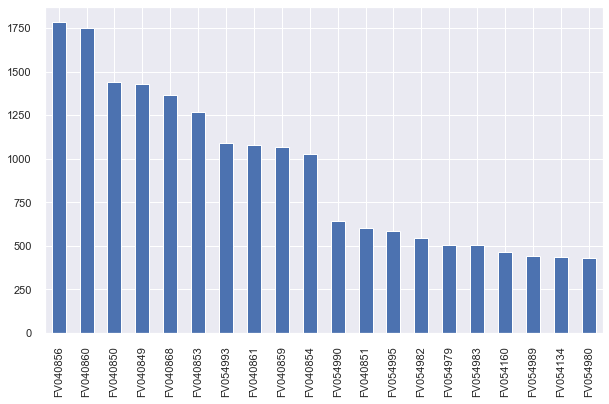

In [345]:
df['Dispositivo'].value_counts().sort_values(ascending=False).head(20).plot.bar(figsize = (10,6));

In [346]:
# los 20 tractores con menos registros
df['Dispositivo'].value_counts().tail(20)

FV054997    33
FV055547    32
FV023819    31
FV055556    30
FV054991    29
FV031119    29
FV054162    24
FV055549    24
FV055553    23
FV022837    20
FV055558    20
FV055541    19
FV055559    18
FV055548    17
FV023795    17
FV054998    16
FV055542    15
FV022051     6
FV055545     2
FV054135     1
Name: Dispositivo, dtype: int64

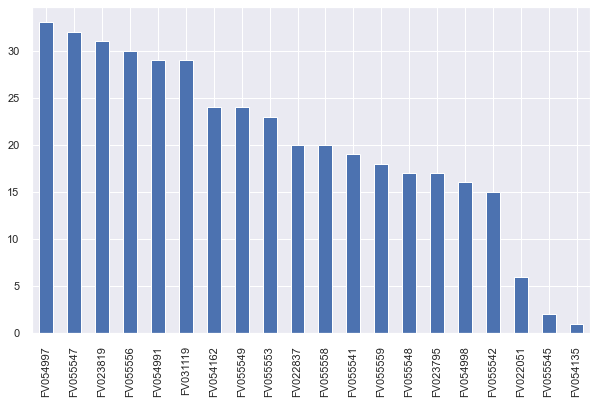

In [347]:
df['Dispositivo'].value_counts().sort_values(ascending=False).tail(20).plot.bar(figsize = (10,6));

### NOMBRE DEL OPERADOR

In [450]:
len(df['Nombre_Comp'].unique())

113

In [348]:
# los 20 operadores con más registros
df['Nombre_Comp'].value_counts().head(20)

ponce serrano abraham               1166
pablo adrian ramirez exiga          1130
solano lopez jorge alberto           901
sanchez andres lucas erasto          884
perez hernandez gerardo              824
munoz oviedo isaias                  786
de la cruz marin vicente dt          781
caballero castaneda jesus cirilo     731
oscarr luna tapia                    661
gonzalez gonzalez jose guadalupe     645
ramirez barrera rodrigo              599
gonzalez ortega luis angel           591
arcos arias armando                  582
martinez ramirez rodolfo             543
aguilar banuelos jose felix          542
angel giovanni hernandez trejo       514
lopez sanchez felipe                 489
malaga dominguez victor manuel       459
hernandez perez alejandro            446
adolfo rafael santiago marquina      438
Name: Nombre_Comp, dtype: int64

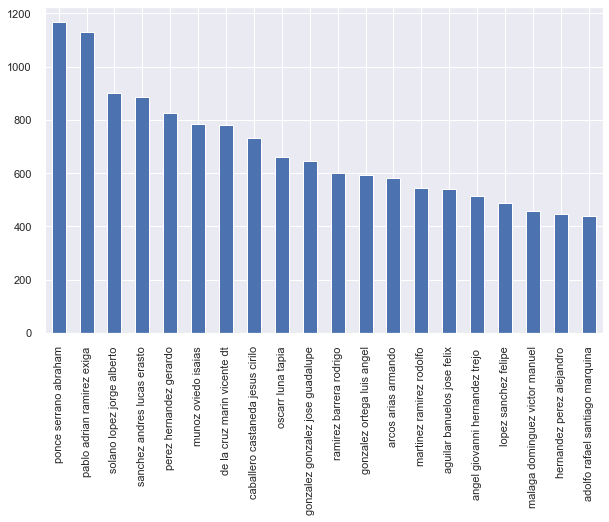

In [349]:
df['Nombre_Comp'].value_counts().sort_values(ascending=False).head(20).plot.bar(figsize = (10,6));

In [350]:
# los 20 operadores con menos registros
df['Nombre_Comp'].value_counts().tail(20)

tirado morales ulises               16
robles figueroa ricardo             14
munguia victoria francisco          11
guillen rojas samuel                 7
santiago salazar miguel              7
martinez marcial rafael              5
munoz trejo bernardo                 4
alvaro tadeoromualdo apolonio        4
sanchez vega benito omar             4
alvarez cruz guillermo               4
gerardobonilla bribiesca             3
lopez rosales humberto               3
juan baez tellez                     2
ramon hernandez muñoz                2
becerril rivas marco antonio         1
morales zuniga alonso                1
gabielgarcia cruz                    1
rolandopenagos hernandez             1
victor manuelde santiago aguilar     1
abraham juarez briceño               1
Name: Nombre_Comp, dtype: int64

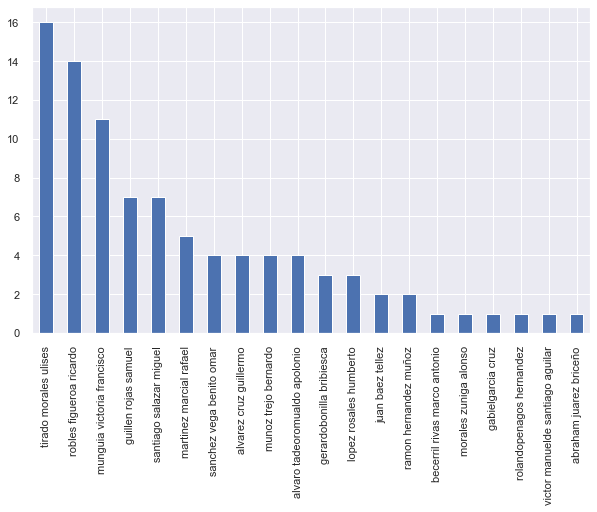

In [351]:
df['Nombre_Comp'].value_counts().sort_values(ascending=False).tail(20).plot.bar(figsize = (10,6));

### DURACIÓN DE CONDUCCIÓN

In [352]:
df['Duración de conducción'].describe()

count                   26282
unique                    254
top       2022-02-25 00:29:00
freq                      627
first     2022-02-25 00:15:00
last      2022-02-25 13:58:00
Name: Duración de conducción, dtype: object

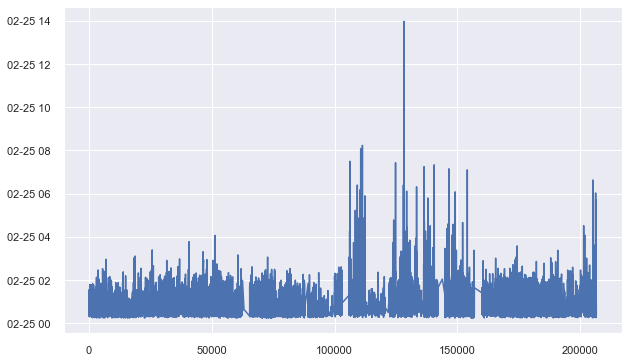

In [353]:
df['Duración de conducción'].plot(figsize=(10,6));

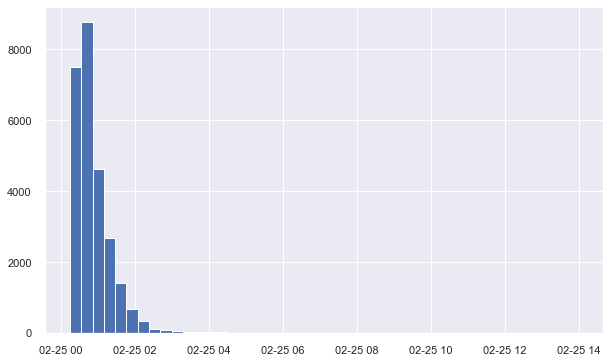

In [354]:
df['Duración de conducción'].hist(figsize=(10,6),bins=45);

In [355]:
# las 20 duraciones de tiempo más registradas
df['Duración de conducción'].value_counts().head(20)

2022-02-25 00:29:00    627
2022-02-25 00:34:00    616
2022-02-25 00:32:00    603
2022-02-25 00:31:00    598
2022-02-25 00:30:00    595
2022-02-25 00:33:00    589
2022-02-25 00:35:00    575
2022-02-25 00:27:00    569
2022-02-25 00:38:00    558
2022-02-25 00:26:00    552
2022-02-25 00:37:00    547
2022-02-25 00:28:00    546
2022-02-25 00:39:00    538
2022-02-25 00:36:00    534
2022-02-25 00:42:00    519
2022-02-25 00:44:00    518
2022-02-25 00:40:00    518
2022-02-25 00:41:00    508
2022-02-25 00:25:00    471
2022-02-25 00:45:00    460
Name: Duración de conducción, dtype: int64

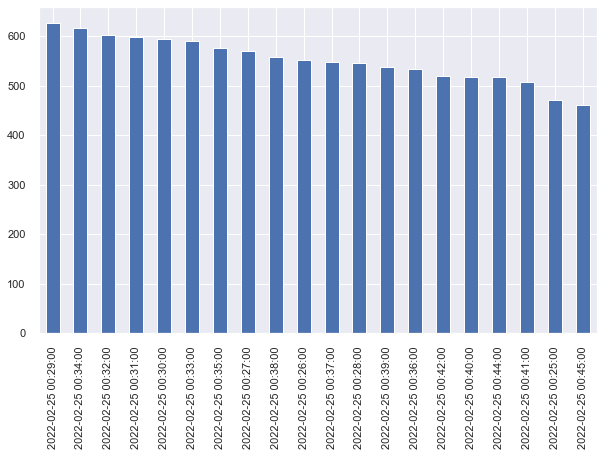

In [356]:
df['Duración de conducción'].value_counts().sort_values(ascending=False).head(20).plot.bar(figsize = (10,6));

In [357]:
# las 20 duraciones de tiempo menos registradas
df['Duración de conducción'].value_counts().tail(20)

2022-02-25 04:52:00    1
2022-02-25 04:21:00    1
2022-02-25 04:22:00    1
2022-02-25 06:11:00    1
2022-02-25 04:10:00    1
2022-02-25 08:05:00    1
2022-02-25 06:59:00    1
2022-02-25 03:08:00    1
2022-02-25 08:14:00    1
2022-02-25 04:53:00    1
2022-02-25 05:54:00    1
2022-02-25 03:45:00    1
2022-02-25 04:47:00    1
2022-02-25 07:26:00    1
2022-02-25 02:44:00    1
2022-02-25 03:31:00    1
2022-02-25 12:56:00    1
2022-02-25 13:58:00    1
2022-02-25 03:46:00    1
2022-02-25 05:43:00    1
Name: Duración de conducción, dtype: int64

### DURACIÓN DE LA PARADA

In [358]:
df['Duración de la parada'].describe()

count                   26282
unique                     60
top       2022-02-25 00:01:00
freq                     3526
first     2022-02-25 00:00:00
last      2022-02-25 00:59:00
Name: Duración de la parada, dtype: object

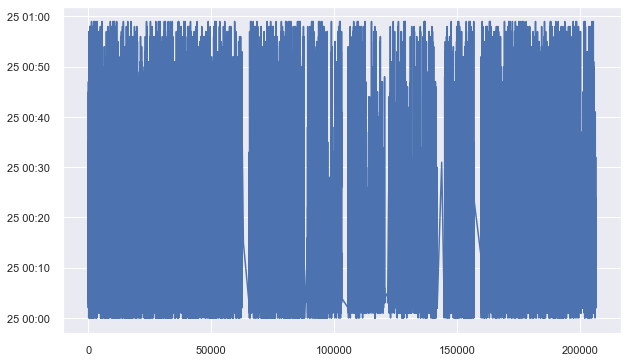

In [359]:
df['Duración de la parada'].plot(figsize=(10,6));

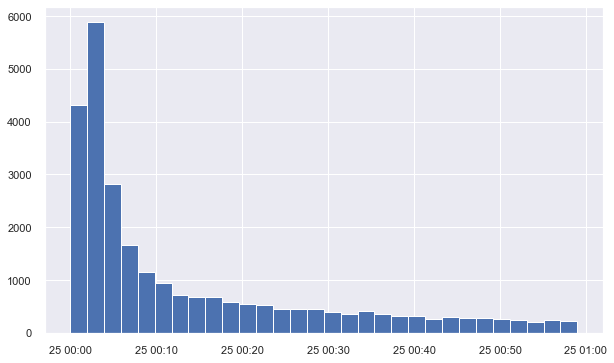

In [360]:
df['Duración de la parada'].hist(figsize=(10,6),bins=30);

In [361]:
# las 20 duraciones de tiempo más registradas
df['Duración de la parada'].value_counts().head(20)

2022-02-25 00:01:00    3526
2022-02-25 00:03:00    3074
2022-02-25 00:02:00    2812
2022-02-25 00:04:00    1675
2022-02-25 00:05:00    1149
2022-02-25 00:06:00    1018
2022-02-25 00:00:00     782
2022-02-25 00:07:00     643
2022-02-25 00:08:00     631
2022-02-25 00:09:00     512
2022-02-25 00:10:00     489
2022-02-25 00:11:00     453
2022-02-25 00:12:00     364
2022-02-25 00:16:00     363
2022-02-25 00:13:00     354
2022-02-25 00:14:00     351
2022-02-25 00:15:00     336
2022-02-25 00:17:00     316
2022-02-25 00:20:00     300
2022-02-25 00:18:00     297
Name: Duración de la parada, dtype: int64

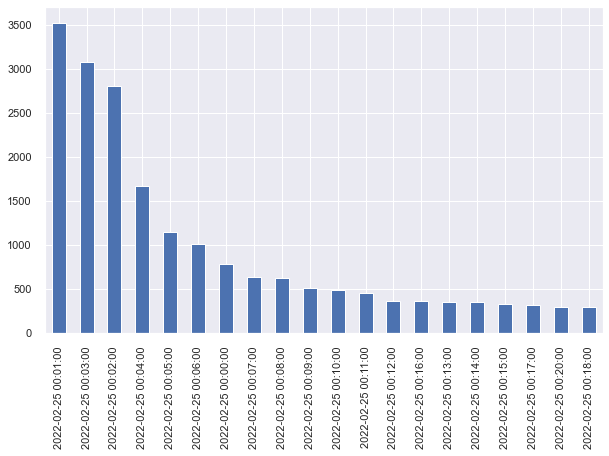

In [362]:
df['Duración de la parada'].value_counts().sort_values(ascending=False).head(20).plot.bar(figsize = (10,6));

In [363]:
# las 20 duraciones de tiempo menos registradas
df['Duración de la parada'].value_counts().tail(20)

2022-02-25 00:45:00    157
2022-02-25 00:41:00    153
2022-02-25 00:48:00    153
2022-02-25 00:38:00    148
2022-02-25 00:47:00    141
2022-02-25 00:42:00    139
2022-02-25 00:46:00    135
2022-02-25 00:44:00    134
2022-02-25 00:50:00    133
2022-02-25 00:52:00    132
2022-02-25 00:51:00    131
2022-02-25 00:57:00    125
2022-02-25 00:58:00    121
2022-02-25 00:49:00    120
2022-02-25 00:43:00    119
2022-02-25 00:56:00    115
2022-02-25 00:53:00    114
2022-02-25 00:59:00    111
2022-02-25 00:54:00    107
2022-02-25 00:55:00    106
Name: Duración de la parada, dtype: int64

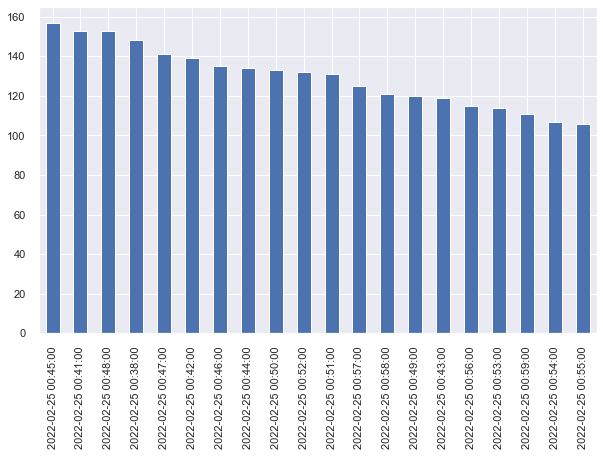

In [364]:
df['Duración de la parada'].value_counts().sort_values(ascending=False).tail(20).plot.bar(figsize = (10,6));

### UBICACIÓN

In [365]:
# las 20 ubicaciones más registradas
df['Ubicación'].value_counts().head(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]    10559
[BMS, PTA, STA, MARIA, BSM, CDMX]       4893
[CEVE, IZTAPALAPA, CDMX]                1010
[CEVE, NAUCALPAN]                        909
[CDS, SAN, ANTONIO, CDMX]                725
[CEVE, TULTITLAN]                        665
[CEVE, CENTENARIO, CDMX]                 562
[CEVE, XALOSTOC]                         446
[CDM, CDS, METROPOLITANO, CDMX]          410
[CEVE, SAN, JUAN]                        393
[CEVE, ATIZAPAN]                         385
[CDS, STA, CLARA]                        371
[CEVE, SAN, LORENZO, CDMX]               331
[CEVE, TEPOTZOTLAN]                      322
[CEVE, CUAUTITLAN]                       272
[CEVE, STA, CLARA]                       269
[CEVE, COACALCO]                         263
[CEVE, VILLA, CDMX]                      257
[CEVE, ROJO, GOMEZ, CDMX]                250
[CEVE, LOS, REYES]                       247
Name: Ubicación, dtype: int64

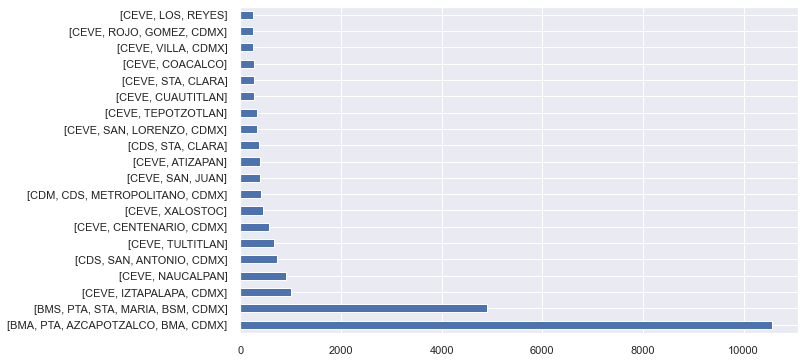

In [366]:
df['Ubicación'].value_counts().sort_values(ascending=False).head(20).plot.barh(figsize = (10,6));

In [367]:
# las 20 ubicaciones menos registradas
df['Ubicación'].value_counts().tail(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[PTA, TOLUCA, III, SUANDY]                14
[PTA, IRAPUATO]                            6
[BLM, PTA, LERMA, BLM]                     5
[CDS, TULTIPARK]                           4
[CEVE, SAN, JUAN, CDMX]                    3
[ABX, CDS, ABASTEX, ABX, CAX]              3
[PTA, MONTERREY]                           3
[CDC, CDS, CUAUTITLAN, CDC]                3
[PTA, GABI]                                3
[BMS, PTA, STA, MARIA, BSM, BIS, CDMX]     2
[AXIS, AXIOLONG]                           2
[CEVE, TULTITLAN, JVR]                     1
[CEVE, TULTITLAN, III]                     1
[BOII, PTA, GUADALAJARA]                   1
[CEVE, TOLUCA, CENTRO]                     1
[PTA, MONTERREY, BODEGA]                   1
[CDMX]                                     1
[PTA, MODERNA]                             1
[CEVE, TOLUCA, AEROPUERTO]                 1
[PTA, HAZPAN]                              1
Name: Ubicación, dtype: int64

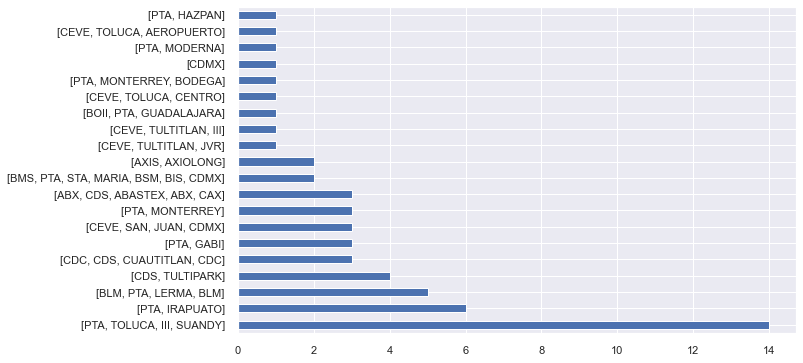

In [368]:
df['Ubicación'].value_counts().sort_values(ascending=False).tail(20).plot.barh(figsize = (10,6));

### TIPOS DE ZONAS DE PARADA

In [369]:
# los tipos de zonas registradas
df['Tipos de zonas de parada'].value_counts().head()

PLANTAS y CEDIS           17150
CeVe                       7153
CENTROS DE VENTA, CeVe     1516
CeVe, delincuency           463
Name: Tipos de zonas de parada, dtype: int64

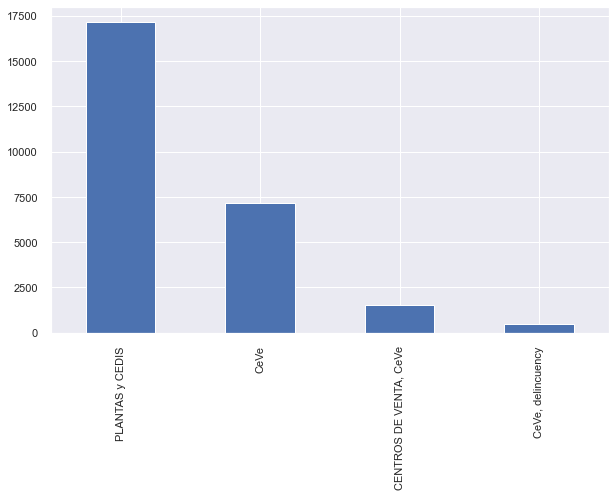

In [370]:
df['Tipos de zonas de parada'].value_counts().sort_values(ascending=False).head(20).plot.bar(figsize = (10,6));

### DISTANCIA

In [377]:
df['Distancia'].describe()

count    26282.000000
mean        23.398257
std         24.646829
min          7.000000
25%         10.000000
50%         18.000000
75%         27.000000
max        914.000000
Name: Distancia, dtype: float64

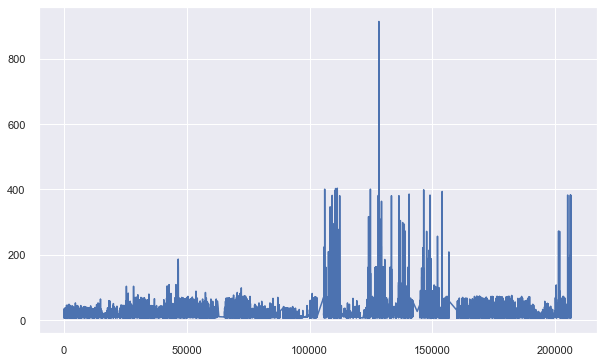

In [378]:
df['Distancia'].plot(figsize=(10,6));

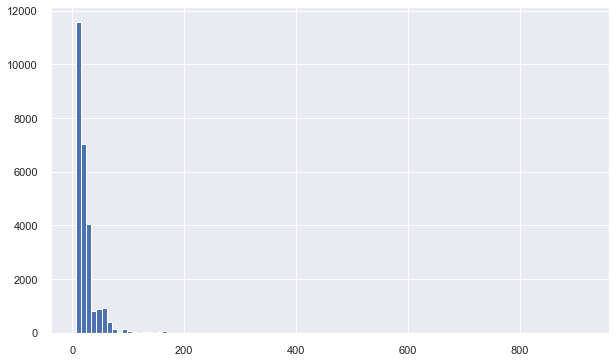

In [379]:
df['Distancia'].hist(figsize=(10,6),bins=100);

<AxesSubplot:>

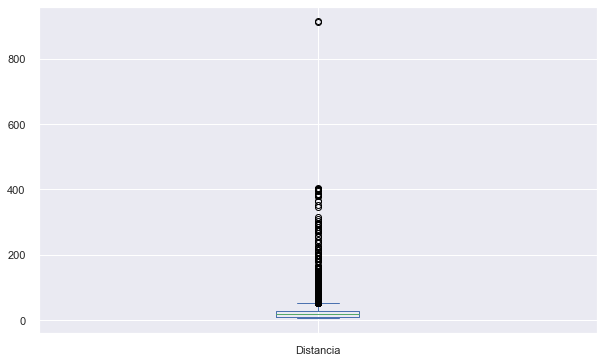

In [380]:
sns.set()
df['Distancia'].plot.box(figsize=(10,6))

In [381]:
df.query("(Distancia >= 500.0)")

,Dispositivo,Nombre_Comp,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
128219,FV023814,ortiz oropeza omar damian,2022-02-25 12:56:00,2022-02-25 00:17:00,"[PTA, MONTERREY]",PLANTAS y CEDIS,914,88
128229,FV023814,ortiz oropeza omar damian,2022-02-25 13:58:00,2022-02-25 00:02:00,"[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]",PLANTAS y CEDIS,911,85


### VELOCIDAD MÁXIMA

In [382]:
df['Velocidad máxima'].describe()

count    26282.000000
mean        64.432844
std         12.259072
min          0.000000
25%         55.000000
50%         63.000000
75%         74.000000
max        116.000000
Name: Velocidad máxima, dtype: float64

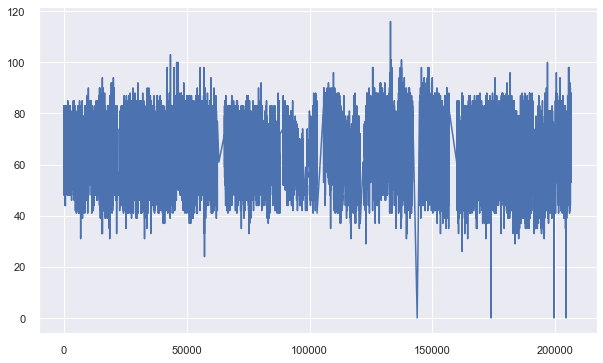

In [383]:
df['Velocidad máxima'].plot(figsize=(10,6));

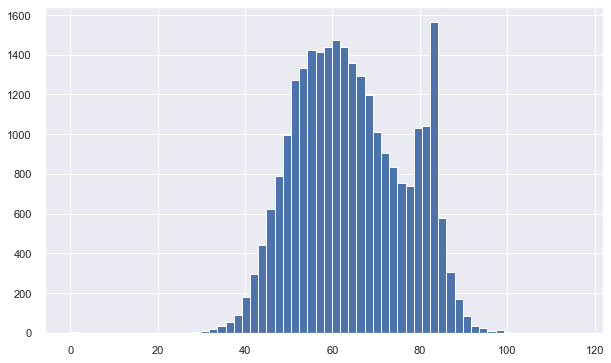

In [384]:
df['Velocidad máxima'].hist(figsize=(10,6),bins=62);

<AxesSubplot:>

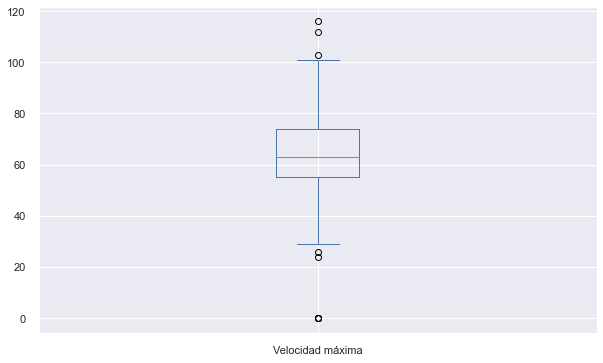

In [385]:
sns.set()
df['Velocidad máxima'].plot.box(figsize=(10,6))

In [386]:
df[df['Velocidad máxima'] >= 100.0]

,Dispositivo,Nombre_Comp,Duración de conducción,Duración de la parada,Ubicación,Tipos de zonas de parada,Distancia,Velocidad máxima
43385,FV040856,hernandez tellez jorge,2022-02-25 00:57:00,2022-02-25 00:39:00,"[CEVE, IXTAPALUCA]",CeVe,50,103
43386,FV040856,hernandez tellez jorge,2022-02-25 00:48:00,2022-02-25 00:22:00,"[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]",PLANTAS y CEDIS,48,100
45908,FV040856,hernandez tellez jorge,2022-02-25 01:06:00,2022-02-25 00:03:00,"[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]",PLANTAS y CEDIS,48,100
46547,FV040856,martinez marcial rafael,2022-02-25 02:58:00,2022-02-25 00:06:00,"[CDM, CDS, METROPOLITANO, CDMX]",PLANTAS y CEDIS,187,100
132953,FV023833,ortiz oropeza omar damian,2022-02-25 01:19:00,2022-02-25 00:02:00,"[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]",PLANTAS y CEDIS,65,116
132976,FV023833,ortiz oropeza omar damian,2022-02-25 01:27:00,2022-02-25 00:01:00,"[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]",PLANTAS y CEDIS,65,112
133125,FV023833,antonio diaz mario,2022-02-25 01:07:00,2022-02-25 00:08:00,"[PTA, IRAPUATO]",PLANTAS y CEDIS,80,101
137423,FV054132,carrillo moreno moises,2022-02-25 00:17:00,2022-02-25 00:05:00,"[CEVE, CUERNAVACA, CIVAC]",CeVe,15,101
196849,FV054994,malaga dominguez victor manuel,2022-02-25 01:18:00,2022-02-25 00:04:00,"[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]",PLANTAS y CEDIS,52,100


## GRÁFICOS BIVARIADOS

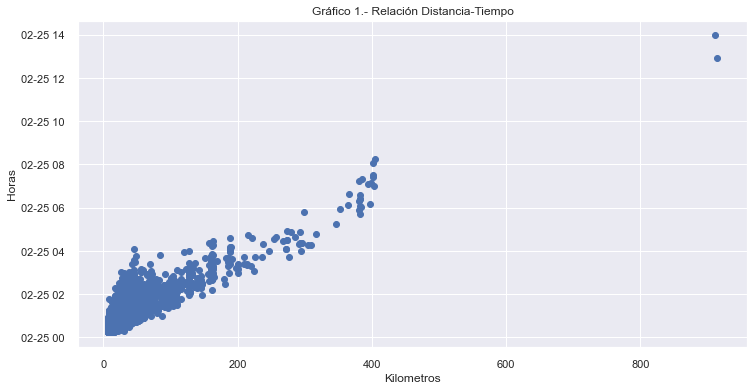

In [387]:
plt.rcParams['figure.figsize']=(12,6)
plt.scatter( 'Distancia','Duración de conducción', data=df, marker='o')
plt.xlabel('Kilometros')
plt.ylabel('Horas')
plt.title('Gráfico 1.- Relación Distancia-Tiempo', loc='center')
plt.show()

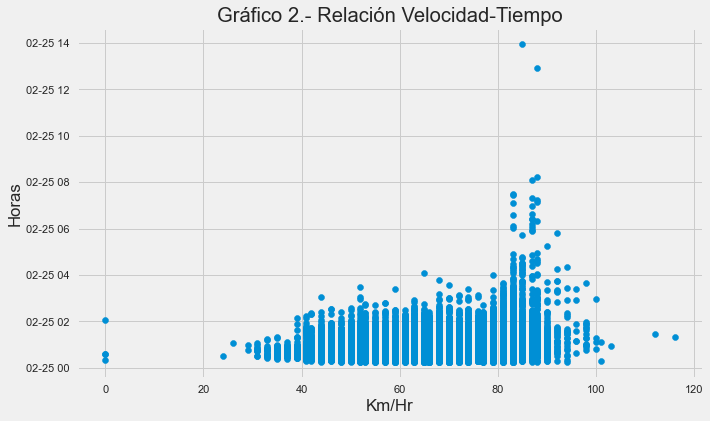

In [460]:
plt.scatter( 'Velocidad máxima','Duración de conducción', data=df, marker='o')
plt.xlabel('Km/Hr')
plt.ylabel('Horas')
plt.title('Gráfico 2.- Relación Velocidad-Tiempo', loc='center')
plt.show()

## MODELACIÓN

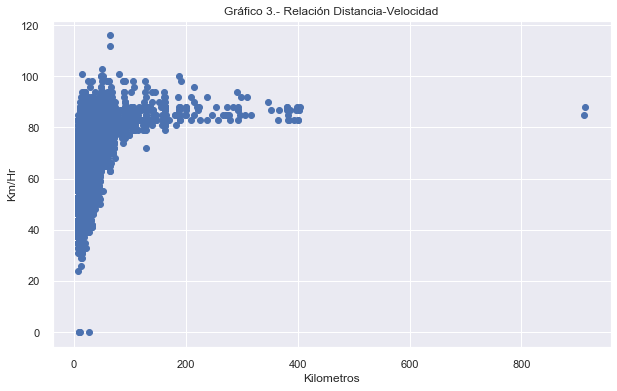

In [389]:
plt.rcParams['figure.figsize']=(10,6)
plt.scatter('Distancia','Velocidad máxima', data=df, marker='o')
plt.xlabel('Kilometros')
plt.ylabel('Km/Hr')
plt.title('Gráfico 3.- Relación Distancia-Velocidad', loc='center')
plt.show()

### EVALUACIÓN

In [390]:
# Encontramos el número óptimo de clusters para k-means
x = df.iloc[:,[6,7]].values

wcss= []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++",max_iter = 100,n_init=10,random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

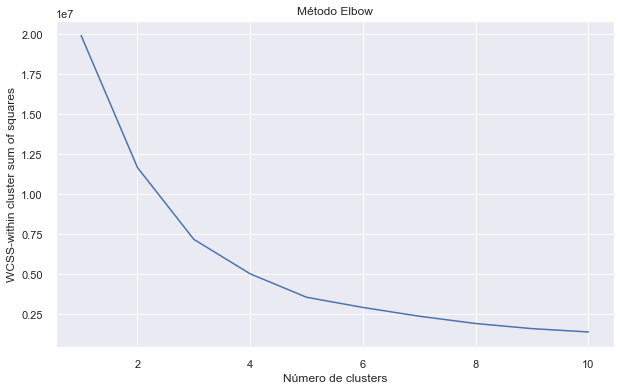

In [391]:
# Graficamos
plt.plot(range(1,11),wcss)
plt.title("Método Elbow")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS-within cluster sum of squares");

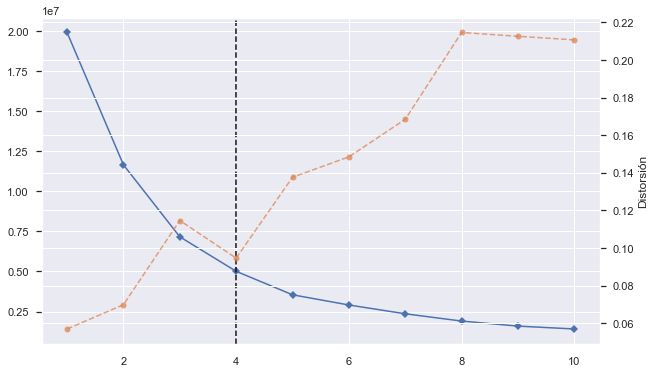

In [392]:
# Usando librería para encontrar hiperpárametro
visualizer=KElbowVisualizer(KMeans(),k=(1,11),timings=True)
visualizer.fit(x)
plt.xlabel("Número de grupos")
plt.ylabel("Distorsión")
plt.show();

In [454]:
silhouette_coefficients = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,init = "k-means++",max_iter = 100,n_init=10,random_state = 0)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

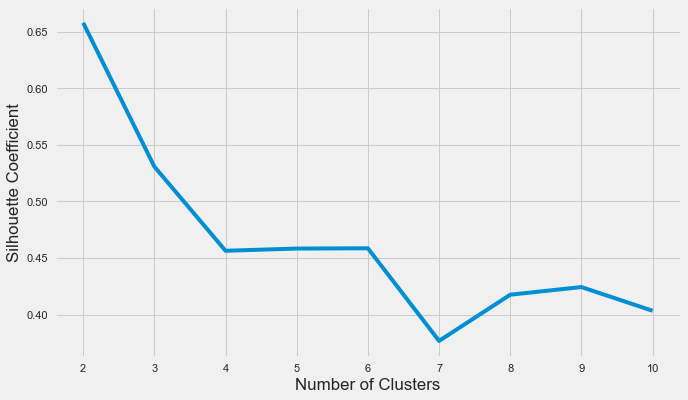

In [456]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [507]:
silhouette_coefficients

[0.6577639457859461,
 0.5307967675898946,
 0.4564735334217488,
 0.45843306530837313,
 0.4586669311783341,
 0.37690230605675246,
 0.41768123944246005,
 0.4244264320260279,
 0.4034723855534253]

### APLICACIÓN DEL MODELO

### K-MEANS

In [393]:
# Ajustamos el modelo
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(x)

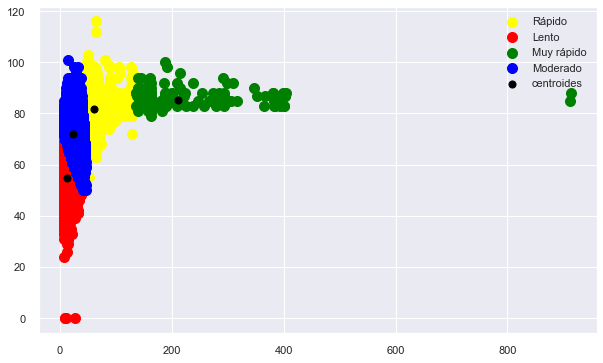

In [413]:
# Graficamos clusters por Sépalo
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c="yellow",label="Rápido")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c="red",label="Lento")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c="green",label="Muy rápido")
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1],s=100,c="blue",label="Moderado")
# Agregamos centroides
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c="black",label="centroides")
plt.legend();

## ANÁLISIS

In [414]:
df['Cluster'] = kmeans.labels_

### CLUSTER LENTO

In [415]:
C1 = df[df['Cluster']==1]

In [416]:
len(C1)

13199

In [417]:
C1['Distancia'].max()

37

In [418]:
C1['Distancia'].min()

7

In [419]:
C1['Dispositivo'].value_counts().head(20)

FV054993    1029
FV040868    1004
FV040860     857
FV040850     830
FV040849     758
FV040861     646
FV040856     594
FV040853     542
FV040854     525
FV054995     510
FV054990     444
FV040859     442
FV054979     351
FV054160     329
FV040851     327
FV054989     276
FV054982     262
FV054983     249
FV054980     243
FV054994     243
Name: Dispositivo, dtype: int64

In [420]:
C1['Nombre_Comp'].value_counts().head(20)

pablo adrian ramirez exiga          869
de la cruz marin vicente dt         754
sanchez andres lucas erasto         570
solano lopez jorge alberto          540
angel giovanni hernandez trejo      500
perez hernandez gerardo             404
ramirez barrera rodrigo             387
martinez ramirez rodolfo            374
oscarr luna tapia                   370
munoz oviedo isaias                 360
gonzalez gonzalez jose guadalupe    353
ponce serrano abraham               345
hernandez perez alejandro           342
cesar mendoza godinez               314
juan marquez jorge                  291
lopez sanchez felipe                291
arcos arias armando                 285
torres diaz nahum                   273
gonzalez ortega luis angel          273
gonzalocampos cortes                270
Name: Nombre_Comp, dtype: int64

In [421]:
C1['Duración de conducción'].value_counts().tail(30)

2022-02-25 01:57:00    4
2022-02-25 02:08:00    4
2022-02-25 01:50:00    4
2022-02-25 01:49:00    4
2022-02-25 02:03:00    3
2022-02-25 01:59:00    3
2022-02-25 02:20:00    3
2022-02-25 02:02:00    3
2022-02-25 02:22:00    2
2022-02-25 02:21:00    2
2022-02-25 02:25:00    2
2022-02-25 02:15:00    2
2022-02-25 02:34:00    2
2022-02-25 02:09:00    2
2022-02-25 02:32:00    1
2022-02-25 02:01:00    1
2022-02-25 02:30:00    1
2022-02-25 02:41:00    1
2022-02-25 02:17:00    1
2022-02-25 03:02:00    1
2022-02-25 02:00:00    1
2022-02-25 02:05:00    1
2022-02-25 02:46:00    1
2022-02-25 02:16:00    1
2022-02-25 02:10:00    1
2022-02-25 02:59:00    1
2022-02-25 01:58:00    1
2022-02-25 02:24:00    1
2022-02-25 02:33:00    1
2022-02-25 02:28:00    1
Name: Duración de conducción, dtype: int64

In [422]:
C1['Ubicación'].value_counts().head(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]    5639
[BMS, PTA, STA, MARIA, BSM, CDMX]      2989
[CEVE, NAUCALPAN]                       846
[CDS, SAN, ANTONIO, CDMX]               595
[CEVE, IZTAPALAPA, CDMX]                332
[CDM, CDS, METROPOLITANO, CDMX]         318
[CEVE, ATIZAPAN]                        304
[CEVE, TULTITLAN]                       225
[CEVE, XALOSTOC]                        221
[CEVE, VILLA, CDMX]                     215
[CEVE, CEYLAN]                          151
[CEVE, SAN, JUAN]                       146
[CEVE, SAN, LORENZO, CDMX]              139
[CEVE, CENTENARIO, CDMX]                132
[CEVE, CUAUTITLAN]                       90
[CEVE, TEPALCATES, CDMX]                 87
[CEVE, VALLEJO, CDMX]                    84
[CEVE, CENTRO, CDMX]                     80
[CEVE, COACALCO]                         79
[CEVE, ROJO, GOMEZ, CDMX]                78
Name: Ubicación, dtype: int64

### CLUSTER MODERADO

In [423]:
C2 = df[df['Cluster']==3]

In [424]:
len(C2)

10162

In [425]:
C2['Distancia'].max()

47

In [426]:
C2['Distancia'].min()

7

In [427]:
C2['Dispositivo'].value_counts().head(20)

FV040856    900
FV040860    678
FV040849    659
FV040853    651
FV040850    601
FV040859    552
FV040854    474
FV040861    420
FV040868    358
FV040851    274
FV054982    240
FV054983    232
FV054984    229
FV008908    219
FV054987    197
FV054990    174
FV054980    167
FV054994    158
FV054986    155
FV054132    145
Name: Dispositivo, dtype: int64

In [428]:
C2['Nombre_Comp'].value_counts().head(20)

ponce serrano abraham               723
caballero castaneda jesus cirilo    441
perez hernandez gerardo             419
aguilar banuelos jose felix         387
munoz oviedo isaias                 361
sanchez andres lucas erasto         310
gonzalez ortega luis angel          310
gonzalez gonzalez jose guadalupe    290
oscarr luna tapia                   284
arcos arias armando                 284
lozano lopez rodolfo                272
aaron antonio flores gonzalez       261
pablo adrian ramirez exiga          257
raymundo mora loyola                240
ramirez barrera rodrigo             200
solano lopez jorge alberto          198
malaga dominguez victor manuel      196
lopez sanchez felipe                195
adolfo rafael santiago marquina     176
juan gabrielperez fuentes           161
Name: Nombre_Comp, dtype: int64

In [429]:
C2['Duración de conducción'].value_counts().tail(30)

2022-02-25 02:07:00    5
2022-02-25 01:59:00    5
2022-02-25 02:20:00    4
2022-02-25 02:09:00    4
2022-02-25 02:11:00    3
2022-02-25 02:01:00    3
2022-02-25 02:25:00    3
2022-02-25 02:12:00    3
2022-02-25 02:02:00    3
2022-02-25 02:13:00    3
2022-02-25 02:23:00    3
2022-02-25 02:15:00    2
2022-02-25 02:16:00    2
2022-02-25 02:26:00    2
2022-02-25 02:32:00    2
2022-02-25 02:36:00    2
2022-02-25 02:33:00    2
2022-02-25 02:21:00    2
2022-02-25 02:52:00    1
2022-02-25 02:51:00    1
2022-02-25 02:48:00    1
2022-02-25 03:02:00    1
2022-02-25 02:47:00    1
2022-02-25 02:54:00    1
2022-02-25 02:39:00    1
2022-02-25 02:19:00    1
2022-02-25 03:28:00    1
2022-02-25 02:27:00    1
2022-02-25 04:04:00    1
2022-02-25 03:23:00    1
Name: Duración de conducción, dtype: int64

In [430]:
C2['Ubicación'].value_counts().head(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]    3577
[BMS, PTA, STA, MARIA, BSM, CDMX]      1788
[CEVE, IZTAPALAPA, CDMX]                628
[CEVE, CENTENARIO, CDMX]                429
[CEVE, TULTITLAN]                       418
[CEVE, TEPOTZOTLAN]                     319
[CDS, STA, CLARA]                       306
[CEVE, SAN, JUAN]                       241
[CEVE, XALOSTOC]                        225
[CEVE, STA, CLARA]                      217
[CEVE, SAN, LORENZO, CDMX]              189
[CEVE, COACALCO]                        182
[CEVE, CUAUTITLAN]                      180
[CEVE, LOS, REYES]                      174
[CEVE, ROJO, GOMEZ, CDMX]               171
[CDS, SAN, ANTONIO, CDMX]               130
[CEVE, TEPALCATES, CDMX]                124
[CEVE, XOCHIMILCO, CDMX]                109
[BMA, PTA, AZCAPOTZALCO, BMA]           102
[CEVE, TEXCOCO]                          86
Name: Ubicación, dtype: int64

### CLUSTER RÁPIDO

In [431]:
C3 = df[df['Cluster']==0]

In [432]:
len(C3)

2720

In [433]:
C3['Distancia'].max()

133

In [434]:
C3['Distancia'].min()

40

In [435]:
C3['Dispositivo'].value_counts().head(20)

FV040856    282
FV040860    213
FV054134    193
FV054159    177
FV054137    174
FV054132    126
FV018461    101
FV023793     98
FV017793     89
FV054138     87
FV040853     74
FV040859     74
FV054986     74
FV017792     67
FV023827     59
FV023828     53
FV023820     50
FV023833     48
FV054982     46
FV023808     41
Name: Dispositivo, dtype: int64

In [436]:
C3['Nombre_Comp'].value_counts().head(20)

caballero castaneda jesus cirilo     181
solano lopez jorge alberto           161
hernandez moreno fernando horacio    144
garcia garcia sergio                 117
maldonado verde roberto carlos       116
ponce serrano abraham                 98
badillo cortes jose luis              94
salas maldonado luis martin           91
antonio diaz mario                    89
romero lopez edgar                    88
de la cruz campos rey                 84
maldonado moreno saul                 80
antonio galindo fidel                 77
martinez toledo jorge alberto         74
munoz oviedo isaias                   65
santillan rivas j jesus               63
ortiz oropeza omar damian             57
villasana vite benito                 50
ruiz martinez jose juan               48
paredes albarran jose luis            45
Name: Nombre_Comp, dtype: int64

In [437]:
C3['Duración de conducción'].value_counts().tail(30)

2022-02-25 02:40:00    2
2022-02-25 03:04:00    2
2022-02-25 02:58:00    2
2022-02-25 02:57:00    2
2022-02-25 02:31:00    2
2022-02-25 03:07:00    2
2022-02-25 03:12:00    1
2022-02-25 03:22:00    1
2022-02-25 03:24:00    1
2022-02-25 02:59:00    1
2022-02-25 03:47:00    1
2022-02-25 03:08:00    1
2022-02-25 02:51:00    1
2022-02-25 00:40:00    1
2022-02-25 04:01:00    1
2022-02-25 02:38:00    1
2022-02-25 03:13:00    1
2022-02-25 02:39:00    1
2022-02-25 03:00:00    1
2022-02-25 03:26:00    1
2022-02-25 02:41:00    1
2022-02-25 03:05:00    1
2022-02-25 03:02:00    1
2022-02-25 03:50:00    1
2022-02-25 02:54:00    1
2022-02-25 03:57:00    1
2022-02-25 02:47:00    1
2022-02-25 03:10:00    1
2022-02-25 02:30:00    1
2022-02-25 03:35:00    1
Name: Duración de conducción, dtype: int64

In [438]:
C3['Ubicación'].value_counts().head(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]    1279
[CEVE, CHALCO]                          167
[BTJ, PTA, TEPEJI]                      165
[CEVE, TIZAYUCA]                        139
[BMS, PTA, STA, MARIA, BSM, CDMX]       115
[PTA, TOLUCA, TIA, ROSA]                112
[CEVE, TEXCOCO]                         100
[PTA, TOLUCA]                            87
[CEVE, CUERNAVACA, BUENAVISTA]           64
[CEVE, TEPEJI, DEL, RIO]                 60
[CEVE, IXTAPALUCA]                       60
[BPU, PTA, PUEBLA, BPU]                  51
[CEVE, IZTAPALAPA, CDMX]                 50
[CDM, CDS, METROPOLITANO, CDMX]          41
[CEVE, XOCHIMILCO, CDMX]                 37
[CEVE, TULTITLAN]                        22
[BMA, PTA, AZCAPOTZALCO, BMA]            22
[CEVE, TEPALCATES, CDMX]                 19
[CEVE, LOS, REYES]                       19
[CEVE, CUERNAVACA, CIVAC]                16
Name: Ubicación, dtype: int64

### CLUSTER MUY RÁPIDO

In [439]:
C4 = df[df['Cluster']==2]

In [440]:
len(C4)

201

In [441]:
C4['Distancia'].max()

914

In [442]:
C4['Distancia'].min()

136

In [443]:
C4['Dispositivo'].value_counts().head(20)

FV023827    43
FV023808    34
FV054132    17
FV018461    14
FV054137    11
FV017793     9
FV054138     8
FV023833     7
FV017792     7
FV040856     6
FV023789     6
FV023820     5
FV023786     5
FV055559     5
FV023819     4
FV023814     4
FV055558     3
FV054134     2
FV022051     2
FV054160     2
Name: Dispositivo, dtype: int64

In [444]:
C4['Nombre_Comp'].value_counts().head(20)

paredes albarran jose luis          48
becerril mendoza jose alfredo       40
genarocruz baena                    19
garcia zamudio jorge                15
cruz duran abel                     14
salas maldonado luis martin         12
ortiz oropeza omar damian            9
garcia arzate sergio                 5
vergara miranda raul                 5
martinez marcial rafael              4
badillo cortes jose luis             4
hernandez franco jorge oscar         3
de la cruz campos rey                3
toledo perez luis                    3
solano lopez jorge alberto           2
tolentino jacome librado anselmo     2
ortega martinez erik                 2
gonzalez almazan adan                2
moreno galindo hugo                  2
gonzalez rosas javier concepcion     2
Name: Nombre_Comp, dtype: int64

In [445]:
C4['Duración de conducción'].value_counts().tail(30)

2022-02-25 04:15:00    1
2022-02-25 02:47:00    1
2022-02-25 02:27:00    1
2022-02-25 03:41:00    1
2022-02-25 03:59:00    1
2022-02-25 05:14:00    1
2022-02-25 07:30:00    1
2022-02-25 02:58:00    1
2022-02-25 02:17:00    1
2022-02-25 08:14:00    1
2022-02-25 04:53:00    1
2022-02-25 06:07:00    1
2022-02-25 02:44:00    1
2022-02-25 05:57:00    1
2022-02-25 02:25:00    1
2022-02-25 03:46:00    1
2022-02-25 13:58:00    1
2022-02-25 12:56:00    1
2022-02-25 03:31:00    1
2022-02-25 02:29:00    1
2022-02-25 02:38:00    1
2022-02-25 05:54:00    1
2022-02-25 02:45:00    1
2022-02-25 02:18:00    1
2022-02-25 07:26:00    1
2022-02-25 04:02:00    1
2022-02-25 01:58:00    1
2022-02-25 04:47:00    1
2022-02-25 03:45:00    1
2022-02-25 05:43:00    1
Name: Duración de conducción, dtype: int64

In [446]:
C4['Ubicación'].value_counts().head(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[BPU, PTA, PUEBLA, BPU]                67
[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]    64
[CDM, CDS, METROPOLITANO, CDMX]        24
[BSL, PTA, SAN, LUIS, POTOSI, BSL]     17
[CEVE, ACAPULCO, SAN, ISIDRO]          12
[CEVE, ACAPULCO, DIAMANTE]              8
[PTA, IRAPUATO]                         5
[PTA, MONTERREY]                        2
[PTA, MONTERREY, BODEGA]                1
[BMS, PTA, STA, MARIA, BSM, CDMX]       1
Name: Ubicación, dtype: int64

## KPROTO-MODELO EXTRA

In [465]:
filtro2 = ['Tipos de zonas de parada','Distancia','Velocidad máxima']
df1 = df.filter(items = filtro2)

In [466]:
categorical_features_idx = [0]
mark_array=df1.values

In [467]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 5562, ncost: 8840929.358226633
Run: 1, iteration: 2/20, moves: 2077, ncost: 8577696.68528645
Run: 1, iteration: 3/20, moves: 1672, ncost: 8447102.364072494
Run: 1, iteration: 4/20, moves: 1424, ncost: 8381087.754477837
Run: 1, iteration: 5/20, moves: 2102, ncost: 8244191.3262838675
Run: 1, iteration: 6/20, moves: 3373, ncost: 7007581.163748055
Run: 1, iteration: 7/20, moves: 2635, ncost: 5653489.336164633
Run: 1, iteration: 8/20, moves: 2079, ncost: 5227704.922952406
Run: 1, iteration: 9/20, moves: 1345, ncost: 5150462.36621227
Run: 1, iteration: 10/20, moves: 590, ncost: 5140330.337562742
Run: 1, iteration: 11/20, moves: 247, ncost: 5138915.773988669
Run: 1, iteration: 12/20, moves: 21, ncost: 5138847.475013854
Run: 1, iteration: 13/20, moves: 0, ncost: 5138847.475013854
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, 

Run: 10, iteration: 12/20, moves: 0, ncost: 5138847.475013854
Best run was number 1


In [468]:
print(kproto.cluster_centroids_)

[['12.610205799097239' '54.67990207329202' 'PLANTAS y CEDIS']
 ['210.44278606965173' '85.20398009950249' 'PLANTAS y CEDIS']
 ['59.950367647058826' '81.85551470588236' 'PLANTAS y CEDIS']
 ['23.786297376093295' '71.81049562682216' 'PLANTAS y CEDIS']]


In [469]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [470]:
df['cluster_KP'] = list(clusters)

### CLUSTER 0-LENTO

In [474]:
c0 = df[df['cluster_KP']== 0]

In [476]:
len(c0)

13071

In [477]:
c0['Distancia'].max()

37

In [478]:
c0['Distancia'].min()

7

In [479]:
c0['Dispositivo'].value_counts().head(20)

FV054993    1027
FV040868     990
FV040860     848
FV040850     820
FV040849     753
FV040861     638
FV040856     583
FV040853     532
FV040854     518
FV054995     509
FV054990     443
FV040859     437
FV054979     350
FV054160     329
FV040851     327
FV054989     276
FV054982     259
FV054983     247
FV054994     242
FV054980     239
Name: Dispositivo, dtype: int64

In [480]:
c0['Nombre_Comp'].value_counts().head(20)

pablo adrian ramirez exiga          856
de la cruz marin vicente dt         754
sanchez andres lucas erasto         564
solano lopez jorge alberto          538
angel giovanni hernandez trejo      500
perez hernandez gerardo             401
ramirez barrera rodrigo             386
oscarr luna tapia                   367
martinez ramirez rodolfo            365
munoz oviedo isaias                 353
gonzalez gonzalez jose guadalupe    349
hernandez perez alejandro           342
ponce serrano abraham               335
cesar mendoza godinez               312
juan marquez jorge                  291
lopez sanchez felipe                290
arcos arias armando                 281
torres diaz nahum                   273
gonzalez ortega luis angel          270
gonzalocampos cortes                269
Name: Nombre_Comp, dtype: int64

In [481]:
c0['Duración de conducción'].value_counts().tail(30)

2022-02-25 01:57:00    4
2022-02-25 02:08:00    4
2022-02-25 01:50:00    4
2022-02-25 01:49:00    4
2022-02-25 02:03:00    3
2022-02-25 01:59:00    3
2022-02-25 02:20:00    3
2022-02-25 02:02:00    3
2022-02-25 02:22:00    2
2022-02-25 02:21:00    2
2022-02-25 02:25:00    2
2022-02-25 02:15:00    2
2022-02-25 02:34:00    2
2022-02-25 02:09:00    2
2022-02-25 02:32:00    1
2022-02-25 02:01:00    1
2022-02-25 02:30:00    1
2022-02-25 02:41:00    1
2022-02-25 02:17:00    1
2022-02-25 03:02:00    1
2022-02-25 02:00:00    1
2022-02-25 02:05:00    1
2022-02-25 02:46:00    1
2022-02-25 02:16:00    1
2022-02-25 02:10:00    1
2022-02-25 02:59:00    1
2022-02-25 01:58:00    1
2022-02-25 02:24:00    1
2022-02-25 02:33:00    1
2022-02-25 02:28:00    1
Name: Duración de conducción, dtype: int64

In [482]:
c0['Ubicación'].value_counts().head(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]    5577
[BMS, PTA, STA, MARIA, BSM, CDMX]      2970
[CEVE, NAUCALPAN]                       840
[CDS, SAN, ANTONIO, CDMX]               594
[CEVE, IZTAPALAPA, CDMX]                327
[CDM, CDS, METROPOLITANO, CDMX]         318
[CEVE, ATIZAPAN]                        302
[CEVE, TULTITLAN]                       225
[CEVE, XALOSTOC]                        218
[CEVE, VILLA, CDMX]                     209
[CEVE, CEYLAN]                          151
[CEVE, SAN, JUAN]                       141
[CEVE, SAN, LORENZO, CDMX]              131
[CEVE, CENTENARIO, CDMX]                129
[CEVE, CUAUTITLAN]                       90
[CEVE, TEPALCATES, CDMX]                 87
[CEVE, VALLEJO, CDMX]                    84
[CEVE, CENTRO, CDMX]                     80
[CEVE, ROJO, GOMEZ, CDMX]                77
[CEVE, COACALCO]                         77
Name: Ubicación, dtype: int64

### CLUSTER 1-MUY RÁPIDO

In [483]:
c1 = df[df['cluster_KP']== 1]

In [484]:
len(c1)

201

In [485]:
c1['Distancia'].max()

914

In [486]:
c1['Distancia'].min()

136

In [487]:
c1['Dispositivo'].value_counts().head(20)

FV023827    43
FV023808    34
FV054132    17
FV018461    14
FV054137    11
FV017793     9
FV054138     8
FV023833     7
FV017792     7
FV040856     6
FV023789     6
FV023820     5
FV023786     5
FV055559     5
FV023819     4
FV023814     4
FV055558     3
FV054134     2
FV022051     2
FV054160     2
Name: Dispositivo, dtype: int64

In [488]:
c1['Nombre_Comp'].value_counts().head(20)

paredes albarran jose luis          48
becerril mendoza jose alfredo       40
genarocruz baena                    19
garcia zamudio jorge                15
cruz duran abel                     14
salas maldonado luis martin         12
ortiz oropeza omar damian            9
garcia arzate sergio                 5
vergara miranda raul                 5
martinez marcial rafael              4
badillo cortes jose luis             4
hernandez franco jorge oscar         3
de la cruz campos rey                3
toledo perez luis                    3
solano lopez jorge alberto           2
tolentino jacome librado anselmo     2
ortega martinez erik                 2
gonzalez almazan adan                2
moreno galindo hugo                  2
gonzalez rosas javier concepcion     2
Name: Nombre_Comp, dtype: int64

In [489]:
c1['Duración de conducción'].value_counts().tail(30)

2022-02-25 04:15:00    1
2022-02-25 02:47:00    1
2022-02-25 02:27:00    1
2022-02-25 03:41:00    1
2022-02-25 03:59:00    1
2022-02-25 05:14:00    1
2022-02-25 07:30:00    1
2022-02-25 02:58:00    1
2022-02-25 02:17:00    1
2022-02-25 08:14:00    1
2022-02-25 04:53:00    1
2022-02-25 06:07:00    1
2022-02-25 02:44:00    1
2022-02-25 05:57:00    1
2022-02-25 02:25:00    1
2022-02-25 03:46:00    1
2022-02-25 13:58:00    1
2022-02-25 12:56:00    1
2022-02-25 03:31:00    1
2022-02-25 02:29:00    1
2022-02-25 02:38:00    1
2022-02-25 05:54:00    1
2022-02-25 02:45:00    1
2022-02-25 02:18:00    1
2022-02-25 07:26:00    1
2022-02-25 04:02:00    1
2022-02-25 01:58:00    1
2022-02-25 04:47:00    1
2022-02-25 03:45:00    1
2022-02-25 05:43:00    1
Name: Duración de conducción, dtype: int64

In [490]:
c1['Ubicación'].value_counts().head(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[BPU, PTA, PUEBLA, BPU]                67
[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]    64
[CDM, CDS, METROPOLITANO, CDMX]        24
[BSL, PTA, SAN, LUIS, POTOSI, BSL]     17
[CEVE, ACAPULCO, SAN, ISIDRO]          12
[CEVE, ACAPULCO, DIAMANTE]              8
[PTA, IRAPUATO]                         5
[PTA, MONTERREY]                        2
[PTA, MONTERREY, BODEGA]                1
[BMS, PTA, STA, MARIA, BSM, CDMX]       1
Name: Ubicación, dtype: int64

### CLUSTER 2-RÁPIDO

In [491]:
c2 = df[df['cluster_KP']== 2]

In [492]:
len(c2)

2720

In [493]:
c2['Distancia'].max()

133

In [494]:
c2['Distancia'].min()

40

In [495]:
c2['Dispositivo'].value_counts().head(20)

FV040856    282
FV040860    213
FV054134    193
FV054159    177
FV054137    174
FV054132    126
FV018461    101
FV023793     98
FV017793     89
FV054138     87
FV040853     74
FV040859     74
FV054986     74
FV017792     67
FV023827     59
FV023828     53
FV023820     50
FV023833     48
FV054982     46
FV023808     41
Name: Dispositivo, dtype: int64

In [496]:
c2['Nombre_Comp'].value_counts().head(20)

caballero castaneda jesus cirilo     181
solano lopez jorge alberto           161
hernandez moreno fernando horacio    144
garcia garcia sergio                 117
maldonado verde roberto carlos       116
ponce serrano abraham                 98
badillo cortes jose luis              94
salas maldonado luis martin           91
antonio diaz mario                    89
romero lopez edgar                    88
de la cruz campos rey                 84
maldonado moreno saul                 80
antonio galindo fidel                 77
martinez toledo jorge alberto         74
munoz oviedo isaias                   65
santillan rivas j jesus               63
ortiz oropeza omar damian             57
villasana vite benito                 50
ruiz martinez jose juan               48
paredes albarran jose luis            45
Name: Nombre_Comp, dtype: int64

In [497]:
c2['Duración de conducción'].value_counts().tail(30)

2022-02-25 02:40:00    2
2022-02-25 03:04:00    2
2022-02-25 02:58:00    2
2022-02-25 02:57:00    2
2022-02-25 02:31:00    2
2022-02-25 03:07:00    2
2022-02-25 03:12:00    1
2022-02-25 03:22:00    1
2022-02-25 03:24:00    1
2022-02-25 02:59:00    1
2022-02-25 03:47:00    1
2022-02-25 03:08:00    1
2022-02-25 02:51:00    1
2022-02-25 00:40:00    1
2022-02-25 04:01:00    1
2022-02-25 02:38:00    1
2022-02-25 03:13:00    1
2022-02-25 02:39:00    1
2022-02-25 03:00:00    1
2022-02-25 03:26:00    1
2022-02-25 02:41:00    1
2022-02-25 03:05:00    1
2022-02-25 03:02:00    1
2022-02-25 03:50:00    1
2022-02-25 02:54:00    1
2022-02-25 03:57:00    1
2022-02-25 02:47:00    1
2022-02-25 03:10:00    1
2022-02-25 02:30:00    1
2022-02-25 03:35:00    1
Name: Duración de conducción, dtype: int64

In [498]:
c2['Ubicación'].value_counts().head(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]    1279
[CEVE, CHALCO]                          167
[BTJ, PTA, TEPEJI]                      165
[CEVE, TIZAYUCA]                        139
[BMS, PTA, STA, MARIA, BSM, CDMX]       115
[PTA, TOLUCA, TIA, ROSA]                112
[CEVE, TEXCOCO]                         100
[PTA, TOLUCA]                            87
[CEVE, CUERNAVACA, BUENAVISTA]           64
[CEVE, TEPEJI, DEL, RIO]                 60
[CEVE, IXTAPALUCA]                       60
[BPU, PTA, PUEBLA, BPU]                  51
[CEVE, IZTAPALAPA, CDMX]                 50
[CDM, CDS, METROPOLITANO, CDMX]          41
[CEVE, XOCHIMILCO, CDMX]                 37
[CEVE, TULTITLAN]                        22
[BMA, PTA, AZCAPOTZALCO, BMA]            22
[CEVE, TEPALCATES, CDMX]                 19
[CEVE, LOS, REYES]                       19
[CEVE, CUERNAVACA, CIVAC]                16
Name: Ubicación, dtype: int64

### CLUSTER 3-MODERADO

In [499]:
c3 = df[df['cluster_KP']== 3]

In [500]:
len(c3)

10290

In [501]:
c3['Distancia'].max()

47

In [502]:
c3['Distancia'].min()

7

In [503]:
c3['Dispositivo'].value_counts().head(20)

FV040856    911
FV040860    687
FV040849    664
FV040853    661
FV040850    611
FV040859    557
FV040854    481
FV040861    428
FV040868    372
FV040851    274
FV054982    243
FV054983    234
FV054984    229
FV008908    224
FV054987    200
FV054990    175
FV054980    171
FV054994    159
FV054986    157
FV054992    146
Name: Dispositivo, dtype: int64

In [504]:
c3['Nombre_Comp'].value_counts().head(20)

ponce serrano abraham               733
caballero castaneda jesus cirilo    445
perez hernandez gerardo             422
aguilar banuelos jose felix         390
munoz oviedo isaias                 368
sanchez andres lucas erasto         316
gonzalez ortega luis angel          313
gonzalez gonzalez jose guadalupe    294
arcos arias armando                 288
oscarr luna tapia                   287
lozano lopez rodolfo                273
pablo adrian ramirez exiga          270
aaron antonio flores gonzalez       264
raymundo mora loyola                242
ramirez barrera rodrigo             201
solano lopez jorge alberto          200
malaga dominguez victor manuel      199
lopez sanchez felipe                196
adolfo rafael santiago marquina     176
martinez ramirez rodolfo            165
Name: Nombre_Comp, dtype: int64

In [505]:
c3['Duración de conducción'].value_counts().tail(30)

2022-02-25 02:07:00    5
2022-02-25 01:59:00    5
2022-02-25 02:20:00    4
2022-02-25 02:09:00    4
2022-02-25 02:02:00    3
2022-02-25 02:12:00    3
2022-02-25 02:01:00    3
2022-02-25 02:13:00    3
2022-02-25 02:23:00    3
2022-02-25 02:25:00    3
2022-02-25 02:11:00    3
2022-02-25 02:33:00    2
2022-02-25 02:26:00    2
2022-02-25 02:16:00    2
2022-02-25 02:15:00    2
2022-02-25 02:36:00    2
2022-02-25 02:32:00    2
2022-02-25 02:21:00    2
2022-02-25 02:52:00    1
2022-02-25 02:51:00    1
2022-02-25 02:48:00    1
2022-02-25 03:02:00    1
2022-02-25 02:47:00    1
2022-02-25 04:04:00    1
2022-02-25 02:39:00    1
2022-02-25 02:19:00    1
2022-02-25 02:54:00    1
2022-02-25 03:28:00    1
2022-02-25 02:27:00    1
2022-02-25 03:23:00    1
Name: Duración de conducción, dtype: int64

In [506]:
c3['Ubicación'].value_counts().head(20)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[BMA, PTA, AZCAPOTZALCO, BMA, CDMX]    3639
[BMS, PTA, STA, MARIA, BSM, CDMX]      1807
[CEVE, IZTAPALAPA, CDMX]                633
[CEVE, CENTENARIO, CDMX]                432
[CEVE, TULTITLAN]                       418
[CEVE, TEPOTZOTLAN]                     319
[CDS, STA, CLARA]                       307
[CEVE, SAN, JUAN]                       246
[CEVE, XALOSTOC]                        228
[CEVE, STA, CLARA]                      217
[CEVE, SAN, LORENZO, CDMX]              197
[CEVE, COACALCO]                        184
[CEVE, CUAUTITLAN]                      180
[CEVE, LOS, REYES]                      176
[CEVE, ROJO, GOMEZ, CDMX]               172
[CDS, SAN, ANTONIO, CDMX]               131
[CEVE, TEPALCATES, CDMX]                124
[CEVE, XOCHIMILCO, CDMX]                109
[BMA, PTA, AZCAPOTZALCO, BMA]           104
[CEVE, TEXCOCO]                          86
Name: Ubicación, dtype: int64